In [1]:
with open('./my_key.key', 'r') as f:
    api_key = next(f)


In [2]:
import datetime
import requests
import urllib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
hist_base_url = 'https://api.worldweatheronline.com/free/v2/past-weather.ashx'
base_url = 'https://api.worldweatheronline.com/free/v2/weather.ashx'
url = '{base_url}?key={api_key}&q={location}&num_of_days=3&tp=3&format=json&cc=no&extra=utcDateTime'.format(
    base_url=base_url,
    api_key=api_key,
    location=urllib.parse.quote('Köln'),
)
#dates in yyyy-MM-dd
hist_url = '{base_url}?key={api_key}&q={location}&date={start}&enddate={end}&tp=3&format=json&cc=no&extra=utcDateTime'.format(
    base_url=hist_base_url,
    api_key=api_key,
    location='Aachen',
    start='2016-02-01',
    end='2016-03-01',
)


In [12]:
resp = requests.get(url)

In [13]:
data = resp.json()


In [14]:
list(data['data'].keys())

['weather', 'request']

In [20]:
data['data']['request']

[{'query': 'Koln, Germany', 'type': 'City'}]

In [15]:
#data['data']['current_condition']

In [25]:
#data['data']['weather'][0]

In [5]:
hist_resp = requests.get(hist_url)

In [6]:
hist_data = hist_resp.json()

In [7]:
list(hist_data['data']['weather'][0].keys())

['uvIndex',
 'mintempF',
 'maxtempC',
 'astronomy',
 'hourly',
 'maxtempF',
 'date',
 'mintempC']

In [8]:
dts = []
vals = []
idxs = []
weather_descritpions = set()
for element in hist_data['data']['weather']:
    for hour_element in element['hourly']:
        year, month, day = list(map(int, hour_element.get('UTCdate').split('-')))
        time = int(hour_element.get('UTCtime'))
        hour, minute = time//100, time%100
        dt = datetime.datetime(year, month, day, hour, minute, 0)
        dts.append(dt)
        weather_descritpions.add(hour_element.get('weatherDesc')[0].get('value'))
        vals.append(float(hour_element.get('tempC')))
        idxs.append(float(hour_element.get('HeatIndexC')))

In [9]:
#hist_data['data']['weather']

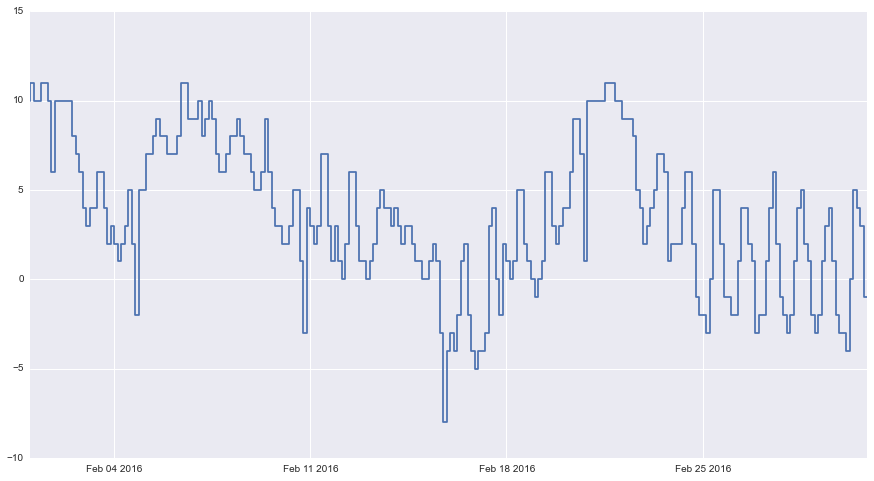

In [11]:
plt.figure(figsize=(15, 8))
plt.step(dts, vals)
#plt.step(dts, idxs)

In [66]:
weather_descritpions

{'Clear',
 'Cloudy',
 'Light drizzle',
 'Light rain',
 'Light rain shower',
 'Light sleet',
 'Light sleet showers',
 'Light snow',
 'Light snow showers',
 'Mist',
 'Moderate or heavy rain in area with thunder',
 'Moderate rain',
 'Overcast',
 'Partly Cloudy',
 'Patchy light drizzle',
 'Patchy light rain',
 'Patchy rain nearby',
 'Patchy sleet nearby',
 'Sunny',
 'Thundery outbreaks in nearby'}